# Image Sensing Pipeline

<img style="float: left;" src="1.png" width="80%">

# In this homework ……

<img style="float: left;" src="2.png" width="80%">

In [1]:
import os
import cv2
import math
import random
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Camera  Parameters

## 1.1 Import Data from tone_curves

In [2]:
curve_path = './'
curve_name = os.path.join(curve_path, 'tone_curves.mat')
curve_inv_name = os.path.join(curve_path, 'tone_curves_inv.mat')
tone_curves = scipy.io.loadmat(curve_name)
tone_curves_inv = scipy.io.loadmat(curve_inv_name)

In [3]:
I = tone_curves['I'] # Irradiance
B = tone_curves['B'] # Brightness
I_inv = tone_curves_inv['invI']
B_inv = tone_curves_inv['invB']

Text(0.5, 1.0, 'Brightness')

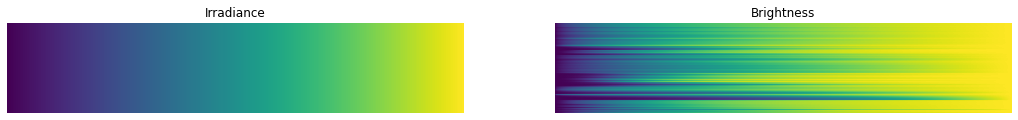

In [4]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(I)
plt.title('Irradiance')
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(B)
plt.title('Brightness')

In [5]:
# Tone Curves Parameters
tone_index = 170
B[tone_index]

array([  0.00000000e+00,   5.76713282e-05,   1.16315903e-04, ...,
         9.95653689e-01,   9.97825503e-01,   1.00000000e+00], dtype=float32)

## 1.2 Color Correction Matrix

In [6]:
ccm = np.array([1.0234, -0.2969, -0.2266, 
                -0.5625, 1.6328, -0.0469, 
                -0.0703, 0.2188, 0.6406])
ccm = np.reshape(ccm, (3, 3))
ccm = (ccm / np.tile(np.sum(ccm, axis=1), [3, 1]).T).T
ccm_inv = np.linalg.inv(np.copy(ccm))

## 1.3 White Balance

In [7]:
# White Balance Parameters
fr = 0.7715567349551743
fb = 0.9068480239589546

# 2.  Load Image

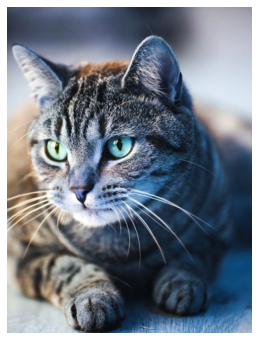

In [8]:
img = cv2.imread('.//images/1.png')
plt.figure(figsize=(12, 6))
plt.axis('off')
plt.imshow(img)

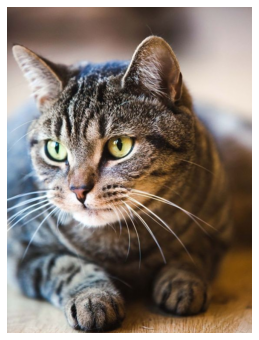

In [9]:
img = cv2.imread('.//images/1.png')
img_gt = img
np.array(img, dtype='uint8')
img = img.astype('double') / 255.0

#### Remember that the image store in OpenCV is BGR instead of RGB
#### We should transfer to RGB first before ISP
plt.figure(figsize=(12, 6))
img = BGR2RGB(img)
plt.axis('off')
plt.imshow(img)

# 3. Inverse ISP Process

## 3.1 Tone Mapping

In [10]:
import numpy as np
import math

def tone_mapping(img, I, B, index=0, inv=False):
    '''
    Input:
        img: H*W*3 numpy array, input image.
        I: 201*1024 array, represents 201 tone curves for Irradiance.
        B: 201*1024 array, represents 201 tone curves for Brightness.
        index: int, choose which curve to use, default is 0
        inv: bool, judge whether tone mapping (False) or inverse tone mapping (True), default is False
    Output:
        output: H*W*3 numpy array, output image afte (inverse) tone mapping.
    '''
    ########################################################################
    # TODO:                                                                #
    #   Following above instruction to get tone mapping as output.         #
    #   and inverse tone mapping result as output                          #
    ########################################################################
    

    
    ########################################################################
    #                                                                      #
    #                           End of your code                           #
    #                                                                      # 
    ########################################################################

    return output

In [11]:
img_inverse_tone = tone_mapping(img, I_inv, B_inv, index=tone_index, inv=True)

Text(0.5, 1.0, 'Image after inverse tone')

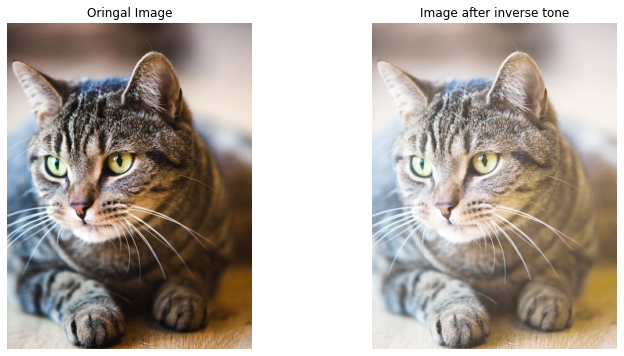

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(img)
plt.title('Oringal Image')
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(img_inverse_tone)
plt.title('Image after inverse tone')

## 3.2 from RGB to CIE XYZ
The CIE XYZ color space is a more universal color representation method that is independent of device characteristics and closer to the perception of the **human visual system**. The CIE XYZ color space is composed of three color components: X, Y, and Z. Among these, X and Y represent the **brightness** and **saturation** of the color, while Z represents the **hue** of the color.

<img style="float: left;" src="./images/3.jpg" width="60%">

In [13]:
#from color_correction import RGB2XYZ
img_inverse_tone_XYZ = RGB2XYZ(img_inverse_tone)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Image after CIE')

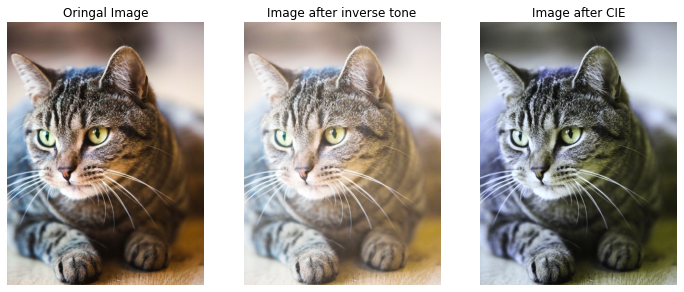

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img)
plt.title('Oringal Image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(img_inverse_tone)
plt.title('Image after inverse tone')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(img_inverse_tone_XYZ)
plt.title('Image after CIE')

## 3.3. Color Correction

In [15]:
def color_correction(img, ccm):
    '''
    Input:
        img: H*W*3 numpy array, input image
        ccm: 3*3 numpy array, color correction matrix 
    Output:
        output: H*W*3 numpy array, output image after color correction
    '''
    ########################################################################
    # TODO:                                                                #
    #   Following above instruction to get color correction result         #
    #                                                                      #
    ########################################################################
    


    ########################################################################
    #                                                                      #
    #                           End of your code                           #
    #                                                                      # 
    ########################################################################
    
    #### Prevent the value larger than 1 or less than 0
    output = np.clip(output, 0, 1)
    return output

In [16]:
ccm

array([[ 2.04720944, -0.54963846, -0.08908884],
       [-0.59391878,  1.59546609,  0.27727791],
       [-0.45329066, -0.04582763,  0.81181092]])

In [17]:
img_inverse_ccm = color_correction(img_inverse_tone_XYZ, ccm)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Image after CCM')

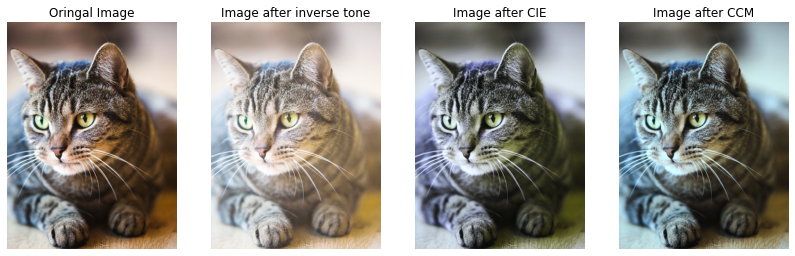

In [18]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 4, 1)
plt.axis('off')
plt.imshow(img)
plt.title('Oringal Image')
plt.subplot(1, 4, 2)
plt.axis('off')
plt.imshow(img_inverse_tone)
plt.title('Image after inverse tone')
plt.subplot(1, 4, 3)
plt.axis('off')
plt.imshow(img_inverse_tone_XYZ)
plt.title('Image after CIE')
plt.subplot(1, 4, 4)
plt.axis('off')
plt.imshow(img_inverse_ccm)
plt.title('Image after CCM')

## 3.4 Mosaic

In [19]:
import colour
from colour.plotting import *

from colour_demosaicing import (
    EXAMPLES_RESOURCES_DIRECTORY,
    demosaicing_CFA_Bayer_bilinear,
    demosaicing_CFA_Bayer_Malvar2004,
    demosaicing_CFA_Bayer_Menon2007,
    mosaicing_CFA_Bayer)

def mosaic(img, pattern):
    '''
    Input:
        img: H*W*3 numpy array, input image.
        pattern: string, 4 different Bayer patterns (GRBG, RGGB, GBRG, BGGR)
    Output:
        output: H*W numpy array, output image after mosaic.
    '''
    ########################################################################
    # TODO:                                                                #
    #   1. Create the H*W output numpy array.                              #   
    #   2. Discard other two channels from input 3-channel image according #
    #      to given Bayer pattern.                                         #
    #                                                                      #
    #   e.g. If Bayer pattern now is BGGR, for the upper left pixel from   #
    #        each four-pixel square, we should discard R and G channel     #
    #        and keep B channel of input image.                            #     
    #        (since upper left pixel is B in BGGR bayer pattern)           #
    ########################################################################
    
    

    ########################################################################
    #                                                                      #
    #                           End of your code                           #
    #                                                                      # 
    ########################################################################

    return output


def demosaic(img, pattern):
    '''
    Input:
        img: H*W numpy array, input RAW image.
        pattern: string, 4 different Bayer patterns (GRBG, RGGB, GBRG, BGGR)
    Output:
        output: H*W*3 numpy array, output de-mosaic image.
    '''
    #### Using Python colour_demosaicing library
    #### You can write your own version, too
    output = demosaicing_CFA_Bayer_Malvar2004(img,pattern)
    output = np.clip(output, 0, 1)

    return output

In [20]:
from demosaic_and_mosaic import mosaic, demosaic
pattern='RGGB'
img_mosaic = mosaic(img_inverse_ccm, pattern=pattern)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Image after mosaic')

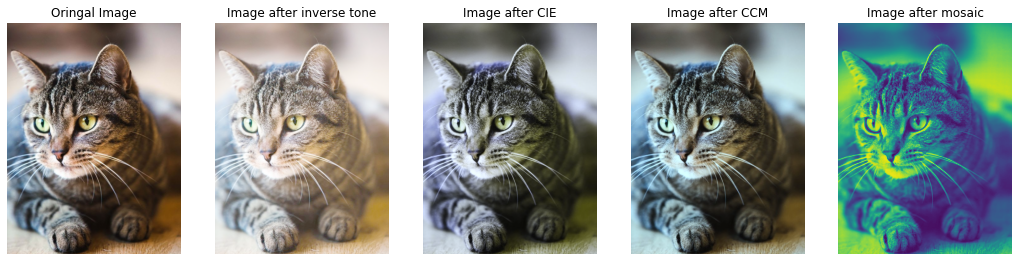

In [21]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 5, 1)
plt.axis('off')
plt.imshow(img)
plt.title('Oringal Image')
plt.subplot(1, 5, 2)
plt.axis('off')
plt.imshow(img_inverse_tone)
plt.title('Image after inverse tone')
plt.subplot(1, 5, 3)
plt.axis('off')
plt.imshow(img_inverse_tone_XYZ)
plt.title('Image after CIE')
plt.subplot(1, 5, 4)
plt.axis('off')
plt.imshow(img_inverse_ccm)
plt.title('Image after CCM')
plt.subplot(1, 5, 5)
plt.axis('off')
plt.imshow(img_mosaic)
plt.title('Image after mosaic')

## 3.5 Inverse AWB
1. Create a numpy array with shape of input RAW image.
2. According to the given Bayer pattern, fill the fr into  correspinding red channel position and fb into correspinding  blue channel position. Fill 1 into green channel position otherwise.  

In [22]:
def generate_wb_mask(img, pattern, fr, fb):
    '''
    Input:
        img: H*W numpy array, RAW image
        pattern: string, 4 different Bayer patterns (GRBG, RGGB, GBRG, BGGR)
        fr: float, white balance factor of red channel
        fb: float, white balance factor of blue channel 
    Output:
        mask: H*W numpy array, white balance mask
    '''
    ########################################################################
    # TODO:                                                                #
    #   1. Create a numpy array with shape of input RAW image.             #
    #   2. According to the given Bayer pattern, fill the fr into          #
    #      correspinding red channel position and fb into correspinding    #
    #      blue channel position. Fill 1 into green channel position       #
    #      otherwise.                                                      #
    ########################################################################


    
    ########################################################################
    #                                                                      #
    #                           End of your code                           #
    #                                                                      # 
    ########################################################################
        
    return mask

In [ ]:
fr = 0.7715567349551743
fb = 0.9068480239589546
wb_mask = generate_wb_mask(img_mosaic, pattern, fr, fb)
img_Inverse_WB = img_mosaic  * wb_mask

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Image after Inverse WB')

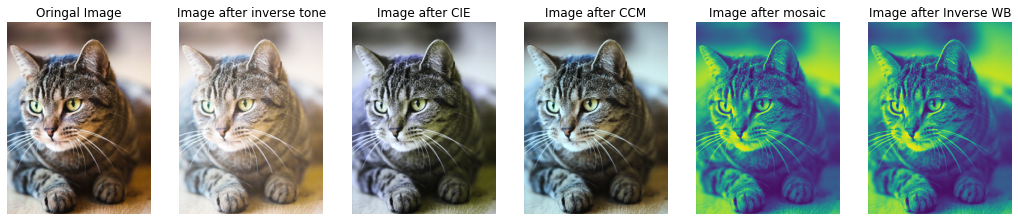

In [24]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 6, 1)
plt.axis('off')
plt.imshow(img)
plt.title('Oringal Image')
plt.subplot(1, 6, 2)
plt.axis('off')
plt.imshow(img_inverse_tone)
plt.title('Image after inverse tone')
plt.subplot(1, 6, 3)
plt.axis('off')
plt.imshow(img_inverse_tone_XYZ)
plt.title('Image after CIE')
plt.subplot(1, 6, 4)
plt.axis('off')
plt.imshow(img_inverse_ccm)
plt.title('Image after CCM')
plt.subplot(1, 6, 5)
plt.axis('off')
plt.imshow(img_mosaic)
plt.title('Image after mosaic')
plt.subplot(1, 6, 6)
plt.axis('off')
plt.imshow(img_Inverse_WB)
plt.title('Image after Inverse WB')

# 4. ISP Process

## 4.1 AWB

In [25]:
wb_mask = generate_wb_mask(img_Inverse_WB, pattern, 1/fr, 1/fb)
img_WB = img_Inverse_WB * wb_mask
img_WB = np.clip(img_WB, 0, 1)

Text(0.5, 1.0, 'Image after WG')

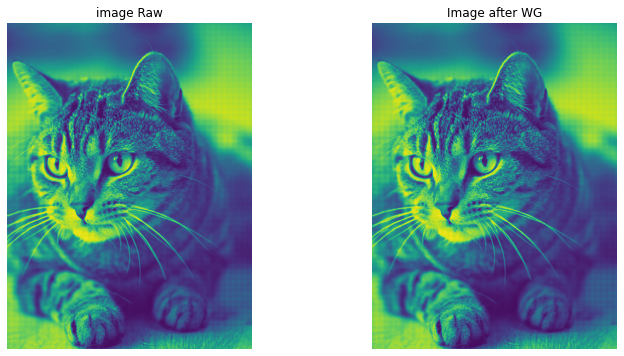

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1);plt.axis('off')
plt.imshow(img_Inverse_WB)
plt.title('image Raw')
plt.subplot(1, 2, 2);plt.axis('off')
plt.imshow(img_WB)
plt.title('Image after WG')

## 4.2 Demosaic

In [27]:
img_demosaic = demosaic(img_WB, pattern=pattern) #pattern='RGGB'

Text(0.5, 1.0, 'Image after demosaic')

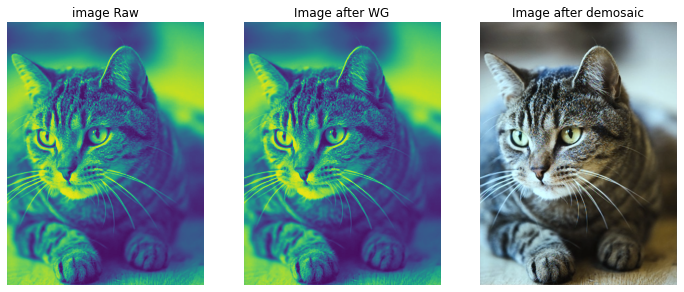

In [28]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1);plt.axis('off')
plt.imshow(img_Inverse_WB)
plt.title('image Raw')
plt.subplot(1, 3, 2);plt.axis('off')
plt.imshow(img_WB)
plt.title('Image after WG')
plt.subplot(1, 3, 3);plt.axis('off')
plt.imshow(img_demosaic)
plt.title('Image after demosaic')

## 4.3 Color Correction

In [29]:
img_color_correction = color_correction(img_demosaic, ccm_inv)

Text(0.5, 1.0, 'Image after Color Correction')

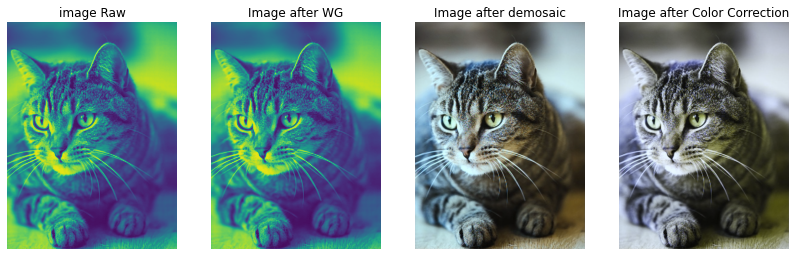

In [30]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 4, 1);plt.axis('off')
plt.imshow(img_Inverse_WB)
plt.title('image Raw')
plt.subplot(1, 4, 2);plt.axis('off')
plt.imshow(img_WB)
plt.title('Image after WG')
plt.subplot(1, 4, 3);plt.axis('off')
plt.imshow(img_demosaic)
plt.title('Image after demosaic')
plt.subplot(1, 4, 4);plt.axis('off')
plt.imshow(img_color_correction)
plt.title('Image after Color Correction')

## 4.4 XYZ2RGB

In [ ]:
img_RGB = XYZ2RGB(img_color_correction)

Text(0.5, 1.0, 'Image after XYZ2RGB')

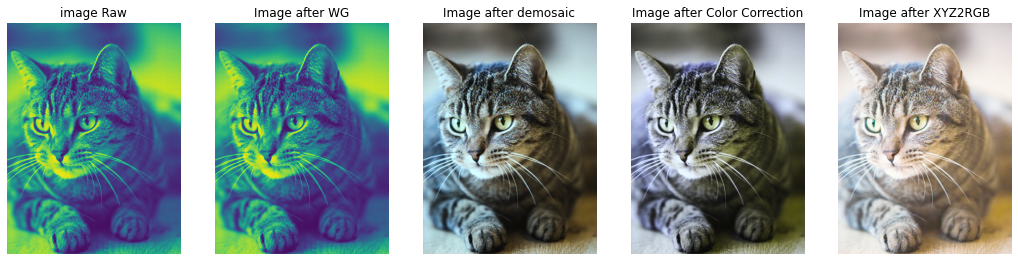

In [32]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 5, 1);plt.axis('off')
plt.imshow(img_Inverse_WB)
plt.title('image Raw')
plt.subplot(1, 5, 2);plt.axis('off')
plt.imshow(img_WB)
plt.title('Image after WG')
plt.subplot(1, 5, 3);plt.axis('off')
plt.imshow(img_demosaic)
plt.title('Image after demosaic')
plt.subplot(1, 5, 4);plt.axis('off')
plt.imshow(img_color_correction)
plt.title('Image after Color Correction')
plt.subplot(1, 5, 5);plt.axis('off')
plt.imshow(img_RGB)
plt.title('Image after XYZ2RGB')

## 4.5 tone_mapping

In [ ]:
img_tm = tone_mapping(img_RGB, I, B, index=tone_index, inv=False)

Text(0.5, 1.0, 'Image after tone mapping')

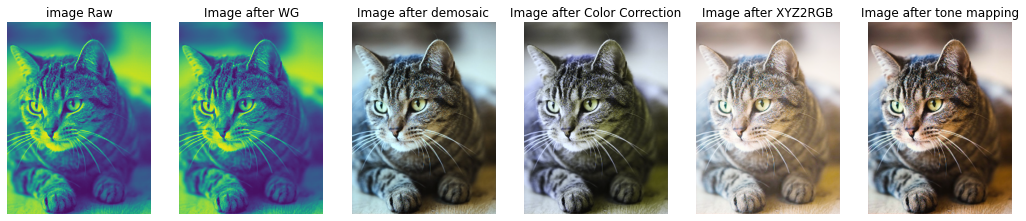

In [34]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 6, 1);plt.axis('off')
plt.imshow(img_Inverse_WB)
plt.title('image Raw')
plt.subplot(1, 6, 2);plt.axis('off')
plt.imshow(img_WB)
plt.title('Image after WG')
plt.subplot(1, 6, 3);plt.axis('off')
plt.imshow(img_demosaic)
plt.title('Image after demosaic')
plt.subplot(1, 6, 4);plt.axis('off')
plt.imshow(img_color_correction)
plt.title('Image after Color Correction')
plt.subplot(1, 6, 5);plt.axis('off')
plt.imshow(img_RGB)
plt.title('Image after XYZ2RGB')
plt.subplot(1, 6, 6);plt.axis('off')
plt.imshow(img_tm)
plt.title('Image after tone mapping')

Text(0.5, 1.0, 'Image after inverse process')

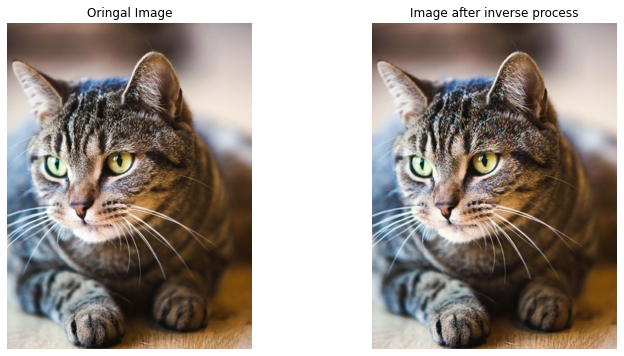

In [35]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1);plt.axis('off')
plt.imshow(img)
plt.title('Oringal Image')
plt.subplot(1, 2, 2);plt.axis('off')
plt.imshow(img_tm)
plt.title('Image after inverse process')

## Peak Signal-to-Noise Ratio

In [ ]:
def calculate_psnr(img1, img2):
    '''
    Input:
        img1, img2: H*W*3 numpy array
    Output:
        psnr: the peak signal-to-noise ratio value
    '''
    ########################################################################
    # TODO:                                                                #
    #   Following above instruction to get PSNR as output.                 #
    #                                                                      #
    ########################################################################

    
    
    
    return psnr

In [37]:
calculate_psnr(img, img_tm)

81.43537077717903